In [64]:
%%capture
%pip install numpy pandas matplotlib seaborn pylatexenc
%pip install -U scikit-learn
%pip install qiskit qiskit-machine-learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix


from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit_machine_learning.utils import algorithm_globals
from qiskit_machine_learning.kernels import FidelityStatevectorKernel 
from qiskit_machine_learning.algorithms import QSVC

algorithm_globals.random_seed = 42

In [ ]:
#===========================================================================================
#30 feature SVC test size = 0.2
#===========================================================================================

data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_classical_scaled, y, test_size=0.2, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)



#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9825
  SVC Precision:   0.9825
  SVC Sensitivity: 0.9825
  SVC Specificity: 0.9762
  SVC F1-Score:    0.9861


In [ ]:
#===========================================================================================
#30 feature SVC test size = 0.1
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_classical_scaled, y, test_size=0.1, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)



#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9649
  SVC Precision:   0.9649
  SVC Sensitivity: 0.9649
  SVC Specificity: 0.9524
  SVC F1-Score:    0.9722


In [ ]:
#===========================================================================================
#10 feature SVC test size = 0.2
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')


scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)

#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
classical_class_zero_data = X_classical_scaled_df[y == 0]
classical_class_one_data = X_classical_scaled_df[y == 1]

classical_fdr_score = {}
for feature in X_classical_scaled_df.columns:
    mu_zero = classical_class_zero_data[feature].mean()
    mu_one = classical_class_one_data[feature].mean()

    sigma_squared_zero = classical_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = classical_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    classical_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
classical_fdr_sorted = sorted(classical_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 10 
best_features_df = pd.DataFrame(classical_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

svc_feature_names = best_features_df['feature_name'].tolist()
X_svc = X_classical_scaled_df[svc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_svc, y, test_size=0.2, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)

#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0

print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9474
  SVC Precision:   0.9474
  SVC Sensitivity: 0.9474
  SVC Specificity: 0.9286
  SVC F1-Score:    0.9583


In [ ]:
#===========================================================================================
#10 feature SVC test size = 0.1
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
classical_class_zero_data = X_classical_scaled_df[y == 0]
classical_class_one_data = X_classical_scaled_df[y == 1]

classical_fdr_score = {}
for feature in X_classical_scaled_df.columns:
    mu_zero = classical_class_zero_data[feature].mean()
    mu_one = classical_class_one_data[feature].mean()

    sigma_squared_zero = classical_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = classical_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    classical_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
classical_fdr_sorted = sorted(classical_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 10 
best_features_df = pd.DataFrame(classical_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

svc_feature_names = best_features_df['feature_name'].tolist()
X_svc = X_classical_scaled_df[svc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_svc, y, test_size=0.1, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)

#Score
simple_r_score = simple_r.score(X_test, y_test)

#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9474
  SVC Precision:   0.9485
  SVC Sensitivity: 0.9474
  SVC Specificity: 0.9524
  SVC F1-Score:    0.9577


In [ ]:
#===========================================================================================
#5 feature SVC test size = 0.2
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
classical_class_zero_data = X_classical_scaled_df[y == 0]
classical_class_one_data = X_classical_scaled_df[y == 1]

classical_fdr_score = {}
for feature in X_classical_scaled_df.columns:
    mu_zero = classical_class_zero_data[feature].mean()
    mu_one = classical_class_one_data[feature].mean()

    sigma_squared_zero = classical_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = classical_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    classical_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
classical_fdr_sorted = sorted(classical_fdr_score.items(), key=lambda item: item[1], reverse=True)


best_fisher = 5 
best_features_df = pd.DataFrame(classical_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

svc_feature_names = best_features_df['feature_name'].tolist()
X_svc = X_classical_scaled_df[svc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_svc, y, test_size=0.2, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)

#Score
simple_r_score = simple_r.score(X_test, y_test)

#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9386
  SVC Precision:   0.9408
  SVC Sensitivity: 0.9386
  SVC Specificity: 0.9524
  SVC F1-Score:    0.9504


In [ ]:
#===========================================================================================
#5 feature SVC test size = 0.1
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

scaler = MinMaxScaler(feature_range=(0, 1))
X_classical_scaled = scaler.fit_transform(X_full_features)
X_classical_scaled_df = pd.DataFrame(X_classical_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
classical_class_zero_data = X_classical_scaled_df[y == 0]
classical_class_one_data = X_classical_scaled_df[y == 1]

classical_fdr_score = {}
for feature in X_classical_scaled_df.columns:
    mu_zero = classical_class_zero_data[feature].mean()
    mu_one = classical_class_one_data[feature].mean()

    sigma_squared_zero = classical_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = classical_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    classical_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
classical_fdr_sorted = sorted(classical_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 5
best_features_df = pd.DataFrame(classical_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

svc_feature_names = best_features_df['feature_name'].tolist()
X_svc = X_classical_scaled_df[svc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_svc, y, test_size=0.1, random_state=42, stratify=y)

simple_r = SVC(kernel='rbf')
simple_r.fit(X_train, y_train)


#Prediction
y_pred_simple_r = simple_r.predict(X_test)

#Accuracy
simple_r_accuracy = accuracy_score(y_test, y_pred_simple_r)

#F1
f1_simple_r = f1_score(y_test, y_pred_simple_r)

#Precision
precision_simple_r = precision_score(y_test, y_pred_simple_r, average='weighted', zero_division=0)

#Sensitivity
sensitivity_simple_r = recall_score(y_test, y_pred_simple_r, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_simple_r).ravel()
specificity_simple_r = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  SVC Accuracy:    {simple_r_accuracy:.4f}")
print(f"  SVC Precision:   {precision_simple_r:.4f}")
print(f"  SVC Sensitivity: {sensitivity_simple_r:.4f}")
print(f"  SVC Specificity: {specificity_simple_r:.4f}")
print(f"  SVC F1-Score:    {f1_simple_r:.4f}")

  SVC Accuracy:    0.9649
  SVC Precision:   0.9680
  SVC Sensitivity: 0.9649
  SVC Specificity: 1.0000
  SVC F1-Score:    0.9714


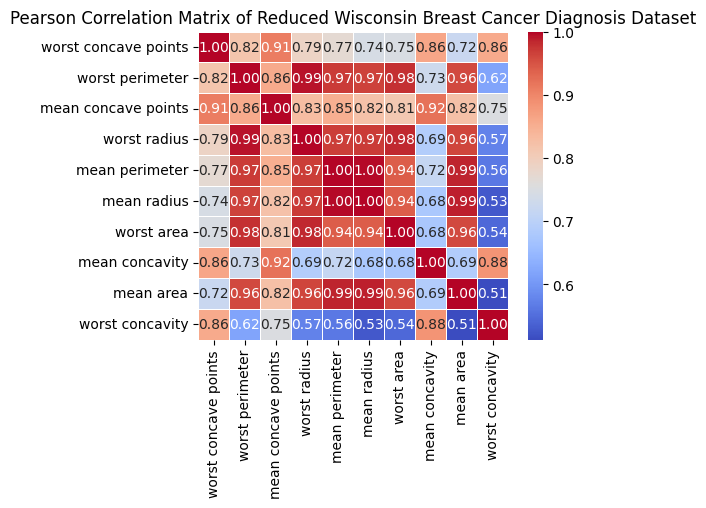

  QSVC Accuracy:    0.9825
  QSVC Precision:   0.9825
  QSVC Sensitivity: 0.9825
  QSVC Specificity: 0.9762
  QSVC F1-Score:    0.9861


In [ ]:
#===========================================================================================
#10 feature QSVC test size = 0.2
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')



#Normalizing features using MinMax [0,pi]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_quantum_scaled = scaler.fit_transform(X_full_features)
X_quantum_scaled_df = pd.DataFrame(X_quantum_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
quantum_class_zero_data = X_quantum_scaled_df[y == 0]
quantum_class_one_data = X_quantum_scaled_df[y == 1]

quantum_fdr_score = {}
for feature in X_quantum_scaled_df.columns:
    mu_zero = quantum_class_zero_data[feature].mean()
    mu_one = quantum_class_one_data[feature].mean()

    sigma_squared_zero = quantum_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = quantum_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    quantum_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
quantum_fdr_sorted = sorted(quantum_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 10 
best_features_df = pd.DataFrame(quantum_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

qsvc_feature_names = best_features_df['feature_name'].tolist()
X_qsvc = X_quantum_scaled_df[qsvc_feature_names]


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_qsvc, y, test_size=0.2, random_state=42, stratify=y)

pearson_matrix = X_qsvc.corr(method='pearson')

#Heatmap Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix of Reduced Wisconsin Breast Cancer Diagnosis Dataset')
plt.show()

#Categorizing Stronger Correlations based on Pearson Correlation Coefficient Score |r| > 0.80 
strong_correlations = []
threshold = 0.80
for i in range(len(qsvc_feature_names)):
    for j in range(i + 1, len(qsvc_feature_names)):
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[j]
        correlation = pearson_matrix.loc[f1, f2]
        if abs(correlation) > threshold:
            strong_correlations.append(((f1, f2), correlation))

#Control Feature Map Design
control_map = {name: i for i, name in enumerate(qsvc_feature_names)}

entangled_pairs_indices = [
    (control_map['worst concave points'], control_map['worst perimeter']),
    (control_map['worst concave points'], control_map['mean concave points']),
    (control_map['worst concave points'], control_map['mean concavity']),
    (control_map['worst concave points'], control_map['worst concavity']),

    (control_map['worst perimeter'], control_map['mean concave points']),
    (control_map['worst perimeter'], control_map['worst radius']),
    (control_map['worst perimeter'], control_map['mean perimeter']),
    (control_map['worst perimeter'], control_map['mean radius']),  
    (control_map['worst perimeter'], control_map['worst area']), 
    (control_map['worst perimeter'], control_map['mean area']),


    (control_map['mean concave points'], control_map['worst radius']),   
    (control_map['mean concave points'], control_map['mean perimeter']),    
    (control_map['mean concave points'], control_map['mean radius']),
    (control_map['mean concave points'], control_map['worst area']),   
    (control_map['mean concave points'], control_map['mean concavity']), 
    (control_map['mean concave points'], control_map['mean area']),

    (control_map['worst radius'], control_map['mean perimeter']),
    (control_map['worst radius'], control_map['mean radius']),
    (control_map['worst radius'], control_map['worst area']),    
    (control_map['worst radius'], control_map['mean area']),

    (control_map['mean perimeter'], control_map['mean radius']),
    (control_map['mean perimeter'], control_map['worst area']),    
    (control_map['mean perimeter'], control_map['mean area']),


    (control_map['mean radius'], control_map['worst area']),
    (control_map['mean radius'], control_map['mean area']),

    (control_map['worst area'], control_map['mean area']),

    (control_map['mean concavity'], control_map['worst concavity'])
]

#Sorting pairs
entangled_pairs_indices = sorted(list(set(tuple(sorted(p)) for p in entangled_pairs_indices)))


#Defining our feature map
def control_map(num_qubits, data_vector, correlations_to_entangle=None):

    qc = QuantumCircuit(num_qubits)
    
    for i in range(num_qubits):
        qc.ry(0.6 * data_vector[i], i)
        qc.rz(0.6 * data_vector[i], i)
    qc.barrier()

    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)
        qc.barrier()
        
    avg_correlations = []
    for i in range(num_qubits):
        f1 = qsvc_feature_names[i]
        avg_corr = 0
        for j in range(num_qubits):
            if i != j:
                f2 = qsvc_feature_names[j]
                avg_corr += abs(pearson_matrix.loc[f1, f2])
        avg_correlations.append(avg_corr / (num_qubits - 1))
    
    # Apply Hadamard to qubits with below-median correlation
    median_corr = np.median(avg_correlations)
    for i in range(num_qubits):
        if avg_correlations[i] < median_corr:
            qc.h(i)
    
    qc.barrier()


    for i in range(num_qubits - 1):
        # Use correlation to next qubit to determine entanglement strength
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[i + 1]
        corr = abs(pearson_matrix.loc[f1, f2])
        
        if corr > 0.8:  # Only entangle if correlation is significant
            qc.crx(corr * data_vector[i], i, i + 1)
    
    # Close the chain if correlation between first and last is strong
    if num_qubits > 2:
        f_first = qsvc_feature_names[0]
        f_last = qsvc_feature_names[num_qubits - 1]
        corr = abs(pearson_matrix.loc[f_first, f_last])
        if corr > 0.8:
            qc.crx(corr * data_vector[num_qubits - 1], num_qubits - 1, 0)

    for i in range(num_qubits):
        qc.rx(data_vector[i], i)
        
    qc.barrier()

    return qc


#Define the parameter vector for 10 features
params = ParameterVector('x', 10)

#Create the custom feature map circuit with the determined entanglement
control_fm_circuit = control_map(10, params, entangled_pairs_indices)

control_fm_circuit.draw('mpl', style='clifford', fold=-1)

algorithm_globals.random_seed = 42


c_k = FidelityStatevectorKernel(feature_map=control_fm_circuit)

qsvc_cq_k = QSVC(quantum_kernel=c_k)
qsvc_cq_k.fit(X_train, y_train)


#Prediction
y_pred_qsvc_cq_k = qsvc_cq_k.predict(X_test)

#Accuracy
qsvc_cq_k_accuracy = accuracy_score(y_test, y_pred_qsvc_cq_k)

#F1
f1_qsvc_cq_k = f1_score(y_test, y_pred_qsvc_cq_k)

#Precision
precision_qsvc_cq_k = precision_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0)

#Sensitivity
sensitivity_qsvc_cq_k = recall_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_qsvc_cq_k).ravel()
specificity_qsvc_cq_k = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  QSVC Accuracy:    {qsvc_cq_k_accuracy:.4f}")
print(f"  QSVC Precision:   {precision_qsvc_cq_k:.4f}")
print(f"  QSVC Sensitivity: {sensitivity_qsvc_cq_k:.4f}")
print(f"  QSVC Specificity: {specificity_qsvc_cq_k:.4f}")
print(f"  QSVC F1-Score:    {f1_qsvc_cq_k:.4f}")

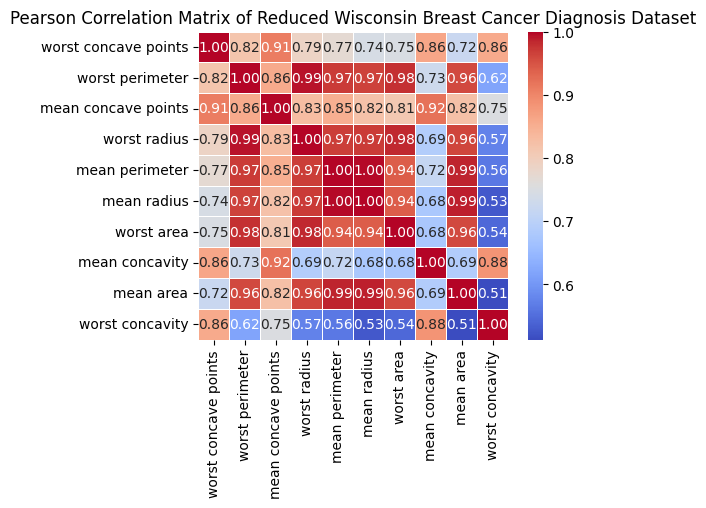

  QSVC Accuracy:    0.9825
  QSVC Precision:   0.9833
  QSVC Sensitivity: 0.9825
  QSVC Specificity: 1.0000
  QSVC F1-Score:    0.9859


In [ ]:
#===========================================================================================
#10 feature QSVC test size = 0.1
#===========================================================================================
data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

#Normalizing features using MinMax [0,pi]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_quantum_scaled = scaler.fit_transform(X_full_features)
X_quantum_scaled_df = pd.DataFrame(X_quantum_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
quantum_class_zero_data = X_quantum_scaled_df[y == 0]
quantum_class_one_data = X_quantum_scaled_df[y == 1]

quantum_fdr_score = {}
for feature in X_quantum_scaled_df.columns:
    mu_zero = quantum_class_zero_data[feature].mean()
    mu_one = quantum_class_one_data[feature].mean()

    sigma_squared_zero = quantum_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = quantum_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    quantum_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
quantum_fdr_sorted = sorted(quantum_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 10 
best_features_df = pd.DataFrame(quantum_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

qsvc_feature_names = best_features_df['feature_name'].tolist()
X_qsvc = X_quantum_scaled_df[qsvc_feature_names]


#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_qsvc, y, test_size=0.1, random_state=42, stratify=y)

pearson_matrix = X_qsvc.corr(method='pearson')

#Heatmap Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix of Reduced Wisconsin Breast Cancer Diagnosis Dataset')
plt.show()

#Categorizing Stronger Correlations based on Pearson Correlation Coefficient Score |r| > 0.80 
strong_correlations = []
threshold = 0.80
for i in range(len(qsvc_feature_names)):
    for j in range(i + 1, len(qsvc_feature_names)):
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[j]
        correlation = pearson_matrix.loc[f1, f2]
        if abs(correlation) > threshold:
            strong_correlations.append(((f1, f2), correlation))

#Control Feature Map Design
control_map = {name: i for i, name in enumerate(qsvc_feature_names)}

entangled_pairs_indices = [
    (control_map['worst concave points'], control_map['worst perimeter']),
    (control_map['worst concave points'], control_map['mean concave points']),
    (control_map['worst concave points'], control_map['mean concavity']),
    (control_map['worst concave points'], control_map['worst concavity']),

    (control_map['worst perimeter'], control_map['mean concave points']),
    (control_map['worst perimeter'], control_map['worst radius']),
    (control_map['worst perimeter'], control_map['mean perimeter']),
    (control_map['worst perimeter'], control_map['mean radius']),  
    (control_map['worst perimeter'], control_map['worst area']), 
    (control_map['worst perimeter'], control_map['mean area']),


    (control_map['mean concave points'], control_map['worst radius']),   
    (control_map['mean concave points'], control_map['mean perimeter']),    
    (control_map['mean concave points'], control_map['mean radius']),
    (control_map['mean concave points'], control_map['worst area']),   
    (control_map['mean concave points'], control_map['mean concavity']), 
    (control_map['mean concave points'], control_map['mean area']),

    (control_map['worst radius'], control_map['mean perimeter']),
    (control_map['worst radius'], control_map['mean radius']),
    (control_map['worst radius'], control_map['worst area']),    
    (control_map['worst radius'], control_map['mean area']),

    (control_map['mean perimeter'], control_map['mean radius']),
    (control_map['mean perimeter'], control_map['worst area']),    
    (control_map['mean perimeter'], control_map['mean area']),


    (control_map['mean radius'], control_map['worst area']),
    (control_map['mean radius'], control_map['mean area']),

    (control_map['worst area'], control_map['mean area']),

    (control_map['mean concavity'], control_map['worst concavity'])
]

#Sorting pairs
entangled_pairs_indices = sorted(list(set(tuple(sorted(p)) for p in entangled_pairs_indices)))


#Defining our feature map
def control_map(num_qubits, data_vector, correlations_to_entangle=None):

    qc = QuantumCircuit(num_qubits)
    
    for i in range(num_qubits):
        qc.ry(0.6 * data_vector[i], i)
        qc.rz(0.6 * data_vector[i], i)
    qc.barrier()

    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)
        qc.barrier()
        
    avg_correlations = []
    for i in range(num_qubits):
        f1 = qsvc_feature_names[i]
        avg_corr = 0
        for j in range(num_qubits):
            if i != j:
                f2 = qsvc_feature_names[j]
                avg_corr += abs(pearson_matrix.loc[f1, f2])
        avg_correlations.append(avg_corr / (num_qubits - 1))
    
    # Apply Hadamard to qubits with below-median correlation
    median_corr = np.median(avg_correlations)
    for i in range(num_qubits):
        if avg_correlations[i] < median_corr:
            qc.h(i)
    
    qc.barrier()


    for i in range(num_qubits - 1):
        # Use correlation to next qubit to determine entanglement strength
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[i + 1]
        corr = abs(pearson_matrix.loc[f1, f2])
        
        if corr > 0.8:  # Only entangle if correlation is significant
            qc.crx(corr * data_vector[i], i, i + 1)
    
    # Close the chain if correlation between first and last is strong
    if num_qubits > 2:
        f_first = qsvc_feature_names[0]
        f_last = qsvc_feature_names[num_qubits - 1]
        corr = abs(pearson_matrix.loc[f_first, f_last])
        if corr > 0.8:
            qc.crx(corr * data_vector[num_qubits - 1], num_qubits - 1, 0)

    for i in range(num_qubits):
        qc.rx(data_vector[i], i)
        
    qc.barrier()

    return qc


#Define the parameter vector for 10 features
params = ParameterVector('x', 10)

#Create the custom feature map circuit with the determined entanglement
control_fm_circuit = control_map(10, params, entangled_pairs_indices)

control_fm_circuit.draw('mpl', style='clifford', fold=-1)

algorithm_globals.random_seed = 42


c_k = FidelityStatevectorKernel(feature_map=control_fm_circuit)

qsvc_cq_k = QSVC(quantum_kernel=c_k)
qsvc_cq_k.fit(X_train, y_train)



#Prediction
y_pred_qsvc_cq_k = qsvc_cq_k.predict(X_test)

#Accuracy
qsvc_cq_k_accuracy = accuracy_score(y_test, y_pred_qsvc_cq_k)

#F1
f1_qsvc_cq_k = f1_score(y_test, y_pred_qsvc_cq_k)

#Precision
precision_qsvc_cq_k = precision_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0)

#Sensitivity
sensitivity_qsvc_cq_k = recall_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_qsvc_cq_k).ravel()
specificity_qsvc_cq_k = tn / (tn + fp) if (tn + fp) > 0 else 0.0



print(f"  QSVC Accuracy:    {qsvc_cq_k_accuracy:.4f}")
print(f"  QSVC Precision:   {precision_qsvc_cq_k:.4f}")
print(f"  QSVC Sensitivity: {sensitivity_qsvc_cq_k:.4f}")
print(f"  QSVC Specificity: {specificity_qsvc_cq_k:.4f}")
print(f"  QSVC F1-Score:    {f1_qsvc_cq_k:.4f}")

(569, 30)
(569,)


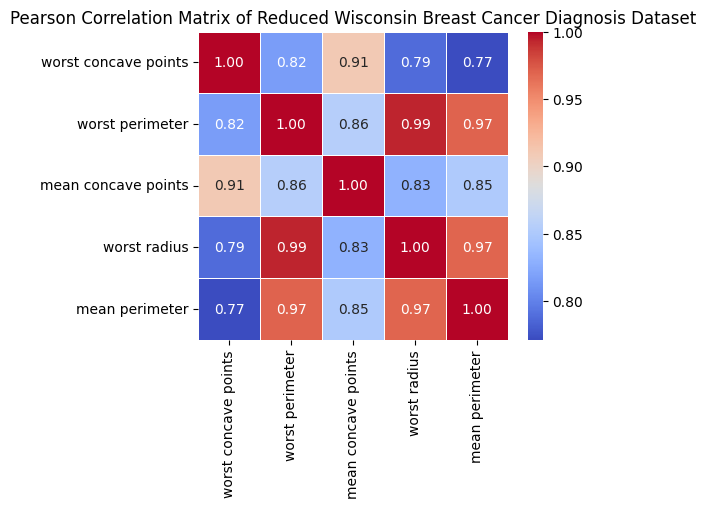

  Quantum Kernel with Control Circuit Accuracy:    0.9298
  Quantum Kernel with Control Circuit Precision:   0.9311
  Quantum Kernel with Control Circuit Sensitivity: 0.9298
  Quantum Kernel with Control Circuit Specificity: 0.9286
  Quantum Kernel with Control Circuit F1-Score:    0.9437


In [ ]:
#=========================================================================================================================================
#QSVC 5 Features 0.2 
#=========================================================================================================================================

data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X_full_features.shape)
print(y.shape)

#Normalizing features using MinMax [0,pi]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_quantum_scaled = scaler.fit_transform(X_full_features)
X_quantum_scaled_df = pd.DataFrame(X_quantum_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
quantum_class_zero_data = X_quantum_scaled_df[y == 0]
quantum_class_one_data = X_quantum_scaled_df[y == 1]

quantum_fdr_score = {}
for feature in X_quantum_scaled_df.columns:
    mu_zero = quantum_class_zero_data[feature].mean()
    mu_one = quantum_class_one_data[feature].mean()

    sigma_squared_zero = quantum_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = quantum_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    quantum_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
quantum_fdr_sorted = sorted(quantum_fdr_score.items(), key=lambda item: item[1], reverse=True)

#Creating new DF with only the best 10 scores
best_fisher = 5
best_features_df = pd.DataFrame(quantum_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

qsvc_feature_names = best_features_df['feature_name'].tolist()
X_qsvc = X_quantum_scaled_df[qsvc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_qsvc, y, test_size=0.2, random_state=42, stratify=y)


#Pearson Matrix
pearson_matrix = X_qsvc.corr(method='pearson')

#Heatmap Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix of Reduced Wisconsin Breast Cancer Diagnosis Dataset')
plt.show()

#Categorizing Stronger Correlations based on Pearson Correlation Coefficient Score |r| > 0.80 
strong_correlations = []
threshold = 0.80
for i in range(len(qsvc_feature_names)):
    for j in range(i + 1, len(qsvc_feature_names)):
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[j]
        correlation = pearson_matrix.loc[f1, f2]
        if abs(correlation) > threshold:
            strong_correlations.append(((f1, f2), correlation))

#Control Feature Map Design

control_map = {name: i for i, name in enumerate(qsvc_feature_names)}

entangled_pairs_indices = [
    (control_map['worst concave points'], control_map['worst perimeter']),
    (control_map['worst concave points'], control_map['mean concave points']),

    (control_map['worst perimeter'], control_map['mean concave points']),
    (control_map['worst perimeter'], control_map['worst radius']),
    (control_map['worst perimeter'], control_map['mean perimeter']),


    (control_map['mean concave points'], control_map['worst radius']),   
    (control_map['mean concave points'], control_map['mean perimeter']),    


    (control_map['worst radius'], control_map['mean perimeter']),
]

#Sorting pairs
entangled_pairs_indices = sorted(list(set(tuple(sorted(p)) for p in entangled_pairs_indices)))


#Defining our feature map
def control_map(num_qubits, data_vector, correlations_to_entangle=None):

    qc = QuantumCircuit(num_qubits)
    
    for i in range(num_qubits):
        qc.ry(0.6 * data_vector[i], i)
        qc.rz(0.6 * data_vector[i], i)
    qc.barrier()

    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)
    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)
        
    avg_correlations = []
    for i in range(num_qubits):
        f1 = qsvc_feature_names[i]
        avg_corr = 0
        for j in range(num_qubits):
            if i != j:
                f2 = qsvc_feature_names[j]
                avg_corr += abs(pearson_matrix.loc[f1, f2])
        avg_correlations.append(avg_corr / (num_qubits - 1))
    
    # Apply Hadamard to qubits with below-median correlation
    median_corr = np.median(avg_correlations)
    for i in range(num_qubits):
        if avg_correlations[i] < median_corr:
            qc.h(i)
    
    qc.barrier()


    for i in range(num_qubits - 1):
        # Use correlation to next qubit to determine entanglement strength
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[i + 1]
        corr = abs(pearson_matrix.loc[f1, f2])
        
        if corr > 0.4:  # Only entangle if correlation is significant
            qc.crx(corr * data_vector[i], i, i + 1)
    
    # Close the chain if correlation between first and last is strong
    if num_qubits > 2:
        f_first = qsvc_feature_names[0]
        f_last = qsvc_feature_names[num_qubits - 1]
        corr = abs(pearson_matrix.loc[f_first, f_last])
        if corr > 0.4:
            qc.crx(corr * data_vector[num_qubits - 1], num_qubits - 1, 0)

    for i in range(num_qubits):
        qc.rx(data_vector[i], i)
        
    qc.barrier()



    return qc


#Define the parameter vector for 10 features
params = ParameterVector('x', 5)

#Create the custom feature map circuit with the determined entanglement
control_fm_circuit = control_map(5, params, entangled_pairs_indices)

control_fm_circuit.draw('mpl', style='iqp', fold=-1)

c_k = FidelityStatevectorKernel(feature_map=control_fm_circuit)

qsvc_cq_k = QSVC(quantum_kernel=c_k)
qsvc_cq_k.fit(X_train, y_train)


#Prediction
y_pred_qsvc_cq_k = qsvc_cq_k.predict(X_test)

#Accuracy
qsvc_cq_k_accuracy = accuracy_score(y_test, y_pred_qsvc_cq_k)

#F1
f1_qsvc_cq_k = f1_score(y_test, y_pred_qsvc_cq_k)

#Precision
precision_qsvc_cq_k = precision_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0)

#Sensitivity
sensitivity_qsvc_cq_k = recall_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_qsvc_cq_k).ravel()
specificity_qsvc_cq_k = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  Quantum Kernel with Control Circuit Accuracy:    {qsvc_cq_k_accuracy:.4f}")
print(f"  Quantum Kernel with Control Circuit Precision:   {precision_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit Sensitivity: {sensitivity_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit Specificity: {specificity_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit F1-Score:    {f1_qsvc_cq_k:.4f}")

(569, 30)
(569,)


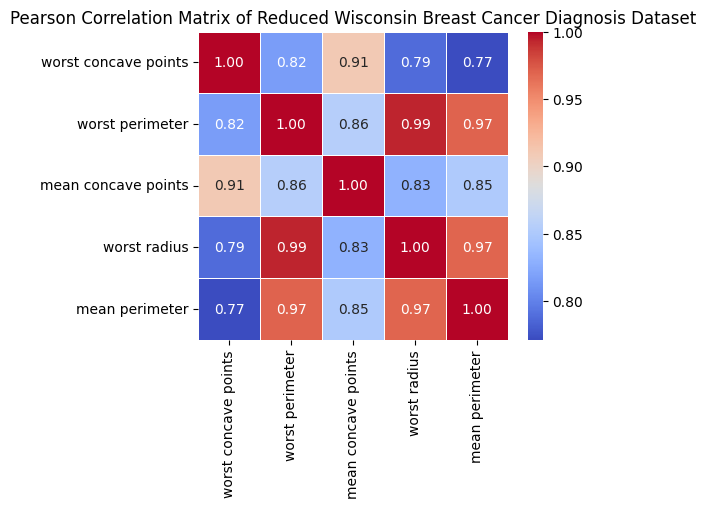

  Quantum Kernel with Control Circuit Accuracy:    0.9825
  Quantum Kernel with Control Circuit Precision:   0.9833
  Quantum Kernel with Control Circuit Sensitivity: 0.9825
  Quantum Kernel with Control Circuit Specificity: 1.0000
  Quantum Kernel with Control Circuit F1-Score:    0.9859


In [ ]:
#=========================================================================================================================================
#QSVC 5 Features 0.1
#=========================================================================================================================================

data = load_breast_cancer()
X_full_features = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X_full_features.shape)
print(y.shape)

#Normalizing features using MinMax [0,pi]
scaler = MinMaxScaler(feature_range=(0, np.pi))
X_quantum_scaled = scaler.fit_transform(X_full_features)
X_quantum_scaled_df = pd.DataFrame(X_quantum_scaled, columns=data.feature_names)


#Separability Analysis for feature reduction utilizing Fisher's Discriminant Ratio
quantum_class_zero_data = X_quantum_scaled_df[y == 0]
quantum_class_one_data = X_quantum_scaled_df[y == 1]

quantum_fdr_score = {}
for feature in X_quantum_scaled_df.columns:
    mu_zero = quantum_class_zero_data[feature].mean()
    mu_one = quantum_class_one_data[feature].mean()

    sigma_squared_zero = quantum_class_zero_data[feature].var(ddof=1)
    sigma_squared_one = quantum_class_one_data[feature].var(ddof=1)

    denominator = sigma_squared_zero + sigma_squared_one

    quantum_fdr_score[feature] = (mu_zero - mu_one)**2 / denominator

#Sorting the FDR scores
quantum_fdr_sorted = sorted(quantum_fdr_score.items(), key=lambda item: item[1], reverse=True)


best_fisher = 5
best_features_df = pd.DataFrame(quantum_fdr_sorted[:best_fisher], columns=['feature_name', 'fdr_score'])

qsvc_feature_names = best_features_df['feature_name'].tolist()
X_qsvc = X_quantum_scaled_df[qsvc_feature_names]

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_qsvc, y, test_size=0.1, random_state=42, stratify=y)


#Pearson Matrix
pearson_matrix = X_qsvc.corr(method='pearson')

#Heatmap Visualization
plt.figure(figsize=(5, 4))
sns.heatmap(pearson_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Matrix of Reduced Wisconsin Breast Cancer Diagnosis Dataset')
plt.show()

#Categorizing Stronger Correlations based on Pearson Correlation Coefficient Score |r| > 0.80 
strong_correlations = []
threshold = 0.80
for i in range(len(qsvc_feature_names)):
    for j in range(i + 1, len(qsvc_feature_names)):
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[j]
        correlation = pearson_matrix.loc[f1, f2]
        if abs(correlation) > threshold:
            strong_correlations.append(((f1, f2), correlation))

#Control Feature Map Design

control_map = {name: i for i, name in enumerate(qsvc_feature_names)}

entangled_pairs_indices = [
    (control_map['worst concave points'], control_map['worst perimeter']),
    (control_map['worst concave points'], control_map['mean concave points']),

    (control_map['worst perimeter'], control_map['mean concave points']),
    (control_map['worst perimeter'], control_map['worst radius']),
    (control_map['worst perimeter'], control_map['mean perimeter']),


    (control_map['mean concave points'], control_map['worst radius']),   
    (control_map['mean concave points'], control_map['mean perimeter']),    


    (control_map['worst radius'], control_map['mean perimeter']),
]

#Sorting pairs
entangled_pairs_indices = sorted(list(set(tuple(sorted(p)) for p in entangled_pairs_indices)))


#Defining our feature map
def control_map(num_qubits, data_vector, correlations_to_entangle=None):

    qc = QuantumCircuit(num_qubits)
    
    for i in range(num_qubits):
        qc.ry(0.6 * data_vector[i], i)
        qc.rz(0.6 * data_vector[i], i)
    qc.barrier()

    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)

    # Entanglement layer of Strongly Correlated Pairs with CNOT + RZ + CNOT block  
    if correlations_to_entangle:
        for q1_idx, q2_idx in correlations_to_entangle:
            f1 = qsvc_feature_names[q1_idx]
            f2 = qsvc_feature_names[q2_idx]
            correlation_strength = abs(pearson_matrix.loc[f1, f2])

            qc.cx(q1_idx, q2_idx)
            angle = correlation_strength * (data_vector[q1_idx] + data_vector[q2_idx])
            qc.rz(2 * angle, q2_idx)
            qc.rz(correlation_strength  * (data_vector[q1_idx] + data_vector[q2_idx]), q2_idx)
            qc.cx(q1_idx, q2_idx)

        qc.barrier()
        
    avg_correlations = []
    for i in range(num_qubits):
        f1 = qsvc_feature_names[i]
        avg_corr = 0
        for j in range(num_qubits):
            if i != j:
                f2 = qsvc_feature_names[j]
                avg_corr += abs(pearson_matrix.loc[f1, f2])
        avg_correlations.append(avg_corr / (num_qubits - 1))
    
    # Apply Hadamard to qubits with below-median correlation
    median_corr = np.median(avg_correlations)
    for i in range(num_qubits):
        if avg_correlations[i] < median_corr:
            qc.h(i)
    
    qc.barrier()


    for i in range(num_qubits - 1):
        # Use correlation to next qubit to determine entanglement strength
        f1 = qsvc_feature_names[i]
        f2 = qsvc_feature_names[i + 1]
        corr = abs(pearson_matrix.loc[f1, f2])
        
        if corr > 0.4:  # Only entangle if correlation is significant
            qc.crx(corr * data_vector[i], i, i + 1)
    
    # Close the chain if correlation between first and last is strong
    if num_qubits > 2:
        f_first = qsvc_feature_names[0]
        f_last = qsvc_feature_names[num_qubits - 1]
        corr = abs(pearson_matrix.loc[f_first, f_last])
        if corr > 0.4:
            qc.crx(corr * data_vector[num_qubits - 1], num_qubits - 1, 0)

    for i in range(num_qubits):
        qc.rx(data_vector[i], i)
        
    qc.barrier()



    return qc


#Define the parameter vector for 10 features
params = ParameterVector('x', 5)

#Create the custom feature map circuit with the determined entanglement
control_fm_circuit = control_map(5, params, entangled_pairs_indices)

control_fm_circuit.draw('mpl', style='iqp', fold=-1)

c_k = FidelityStatevectorKernel(feature_map=control_fm_circuit)

qsvc_cq_k = QSVC(quantum_kernel=c_k)
qsvc_cq_k.fit(X_train, y_train)


#Prediction
y_pred_qsvc_cq_k = qsvc_cq_k.predict(X_test)

#Accuracy
qsvc_cq_k_accuracy = accuracy_score(y_test, y_pred_qsvc_cq_k)

#F1
f1_qsvc_cq_k = f1_score(y_test, y_pred_qsvc_cq_k)

#Precision
precision_qsvc_cq_k = precision_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0)

#Sensitivity
sensitivity_qsvc_cq_k = recall_score(y_test, y_pred_qsvc_cq_k, average='weighted', zero_division=0) 

#Specificity
n_classes = len(np.unique(y_train))
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_qsvc_cq_k).ravel()
specificity_qsvc_cq_k = tn / (tn + fp) if (tn + fp) > 0 else 0.0


print(f"  Quantum Kernel with Control Circuit Accuracy:    {qsvc_cq_k_accuracy:.4f}")
print(f"  Quantum Kernel with Control Circuit Precision:   {precision_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit Sensitivity: {sensitivity_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit Specificity: {specificity_qsvc_cq_k:.4f}")
print(f"  Quantum Kernel with Control Circuit F1-Score:    {f1_qsvc_cq_k:.4f}")